In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
trainDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\raMSIn\\df_train_raMSIn4nonInDI_STDnorm.csv")
extDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\raMSIn\\df_ext_raMSIn4nonInDI_STDnorm.csv")
ingestedDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\raMSIn\\df_ingested_raMSIn4nonInDI_STDnorm.csv")
fnaDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\raMSIn\\df_FNA_raMSIn4nonInDI_STDnorm.csv")
diDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\raMSIn\\df_nonInDI_raMSIn4nonInDI_STDnorm.csv")

In [3]:
trainDEFSDf.describe()

,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478,type
count,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,90960.000000
mean,-1.316839e-13,-6.186316e-14,-2.660058e-15,-3.764154e-13,-1.006823e-14,2.607306e-14,1.984233e-15,-3.149918e-14,-3.196764e-15,1.605030e-13,1.154150e-14,-1.315054e-13,1.460224e-15,-1.131298e-13,5.753411e-16,-2.151086e-13,4.873710e-14,0.478353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499534
min,-1.115625e+00,-1.036221e+00,-4.018920e+00,-4.026853e-01,-2.506283e+00,-7.049558e-01,-2.906350e+00,-1.833425e+00,-3.318155e+00,-1.168280e+00,-4.650283e-02,-1.233960e+00,-6.917359e-01,-1.195235e+00,-3.679214e+00,-4.248501e-01,-7.350831e-01,0.000000
25%,-1.115625e+00,-1.036221e+00,-6.737576e-01,-4.026853e-01,-5.613985e-01,-7.049558e-01,-6.615411e-01,-1.866805e-01,-8.242086e-01,-1.168280e+00,-4.650283e-02,-1.233960e+00,-6.917359e-01,-1.195235e+00,-4.788876e-01,-4.248501e-01,-7.350831e-01,0.000000
50%,1.427686e-01,4.205131e-01,-1.233234e-01,-4.026853e-01,-7.194269e-03,-7.049558e-01,-1.053084e-01,3.017853e-01,6.909915e-02,4.390406e-01,-4.650283e-02,1.491995e-01,-6.917359e-01,1.433784e-01,2.688110e-04,-4.248501e-01,3.497211e-02,0.000000
75%,4.712707e-01,9.344887e-01,5.633877e-01,-4.026853e-01,6.046067e-01,5.472276e-01,4.777020e-01,6.659833e-01,7.855118e-01,8.551193e-01,-4.650283e-02,5.518710e-01,7.431970e-01,5.066546e-01,4.790464e-01,-4.248501e-01,4.014287e-01,1.000000
max,1.045449e+01,2.980306e+00,5.839969e+00,5.598202e+00,3.902593e+00,1.097877e+01,4.192584e+00,2.649648e+00,3.373507e+00,3.528922e+00,2.897652e+01,9.311021e+00,9.482410e+00,9.827048e+00,7.260110e+00,9.819589e+00,1.325025e+01,1.000000


In [4]:
trainDEFSDf

,pixel_id,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478,type
0,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.688111,0.572632,-1.174275,-0.402685,-0.452294,4.484746,-0.685990,0.523277,-0.553016,1.064326,-0.046503,2.433592,2.536437,3.236938,1.379780,-0.424850,4.516228,0
1,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,5.100711,1.502384,-0.377359,-0.402685,-0.245971,5.600166,-1.129480,0.254736,-0.685862,1.372705,-0.046503,3.295405,3.186475,4.400280,3.286631,-0.424850,5.492250,0
2,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.446238,0.633067,-0.825036,-0.402685,-0.436322,3.698358,-1.062778,-0.138344,-0.590147,0.989152,-0.046503,2.422201,2.616717,2.951801,2.283747,-0.424850,4.409029,0
3,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.197065,0.438803,-0.418424,-0.402685,-0.338349,3.487575,-1.009749,-0.087386,-0.714693,1.281385,-0.046503,2.330914,2.116008,2.725915,2.047144,-0.424850,4.249139,0
4,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,1.997365,0.762296,-1.300452,-0.402685,-0.327447,2.554686,-1.030780,0.621524,-0.431587,0.783422,-0.046503,1.465060,1.970677,1.668743,1.036566,-0.424850,2.983302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.410648,-1.036221,0.041017,-0.402685,-0.904559,0.729069,-1.407607,1.081844,-1.162534,-1.168280,-0.046503,0.451770,0.671118,0.388205,0.417243,2.170259,0.504114,1
90956,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.252523,-1.036221,-0.899514,-0.402685,-0.389559,0.861528,-1.347767,1.340689,-1.305998,0.717326,-0.046503,0.530942,0.710665,0.407962,2.303768,-0.424850,0.259900,1
90957,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.357586,1.266093,-0.920759,-0.402685,-0.574288,0.514129,-0.809247,0.871351,-1.048595,-1.168280,-0.046503,0.493749,1.044021,0.412257,1.567262,-0.424850,-0.735083,1
90958,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.526709,-1.036221,-1.209449,-0.402685,-1.037316,0.694260,-0.977460,0.664582,-1.091385,-1.168280,-0.046503,0.357653,-0.691736,0.401013,2.067573,-0.424850,0.671797,1


In [5]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="inferno", vmin=0, vmax=1.0)

In [6]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[1:-1]]
extDEFSDf = extDEFSDf[extDEFSDf.columns[1:-1]]
fnaDEFSDf = fnaDEFSDf[fnaDEFSDf.columns[1:-1]]
ingestedDEFSDf = ingestedDEFSDf[ingestedDEFSDf.columns[1:-1]]
diDEFSDf = diDEFSDf[diDEFSDf.columns[1:-1]]

In [7]:
trainDEFSDf

,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478
0,3.688111,0.572632,-1.174275,-0.402685,-0.452294,4.484746,-0.685990,0.523277,-0.553016,1.064326,-0.046503,2.433592,2.536437,3.236938,1.379780,-0.424850,4.516228
1,5.100711,1.502384,-0.377359,-0.402685,-0.245971,5.600166,-1.129480,0.254736,-0.685862,1.372705,-0.046503,3.295405,3.186475,4.400280,3.286631,-0.424850,5.492250
2,3.446238,0.633067,-0.825036,-0.402685,-0.436322,3.698358,-1.062778,-0.138344,-0.590147,0.989152,-0.046503,2.422201,2.616717,2.951801,2.283747,-0.424850,4.409029
3,3.197065,0.438803,-0.418424,-0.402685,-0.338349,3.487575,-1.009749,-0.087386,-0.714693,1.281385,-0.046503,2.330914,2.116008,2.725915,2.047144,-0.424850,4.249139
4,1.997365,0.762296,-1.300452,-0.402685,-0.327447,2.554686,-1.030780,0.621524,-0.431587,0.783422,-0.046503,1.465060,1.970677,1.668743,1.036566,-0.424850,2.983302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,0.410648,-1.036221,0.041017,-0.402685,-0.904559,0.729069,-1.407607,1.081844,-1.162534,-1.168280,-0.046503,0.451770,0.671118,0.388205,0.417243,2.170259,0.504114
90956,0.252523,-1.036221,-0.899514,-0.402685,-0.389559,0.861528,-1.347767,1.340689,-1.305998,0.717326,-0.046503,0.530942,0.710665,0.407962,2.303768,-0.424850,0.259900
90957,0.357586,1.266093,-0.920759,-0.402685,-0.574288,0.514129,-0.809247,0.871351,-1.048595,-1.168280,-0.046503,0.493749,1.044021,0.412257,1.567262,-0.424850,-0.735083
90958,0.526709,-1.036221,-1.209449,-0.402685,-1.037316,0.694260,-0.977460,0.664582,-1.091385,-1.168280,-0.046503,0.357653,-0.691736,0.401013,2.067573,-0.424850,0.671797


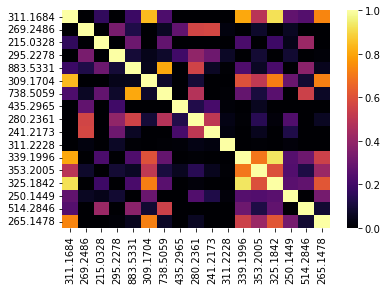

In [9]:
sns_heatmap(trainDEFSDf.corr())

In [10]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [16]:
mz_corr(trainDEFSDf, "trainDEFSDf")

,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478
311.1684,NaN,0.221189,0.162754,0.070273,0.185481,0.840527,0.226885,0.139563,0.002677,0.257303,0.007823,0.808120,0.494888,0.919320,0.273471,0.244599,0.733175
269.2486,NaN,NaN,0.280995,0.332572,0.121552,0.003666,0.065494,0.276979,0.560097,0.567911,0.023879,0.230435,0.076089,0.216447,0.060888,0.229306,0.064627
215.0328,NaN,NaN,NaN,0.137501,0.303128,0.032002,0.277909,0.103354,0.122823,0.295906,0.007083,0.222413,0.030431,0.191256,0.045288,0.414266,0.009863
295.2278,NaN,NaN,NaN,NaN,0.096982,0.045079,0.074848,0.198204,0.394058,0.305964,0.070079,0.071945,0.091217,0.063286,0.087605,0.106218,0.012680
883.5331,NaN,NaN,NaN,NaN,NaN,0.049155,0.804901,0.089925,0.552799,0.063837,0.011309,0.231412,0.064179,0.214894,0.020936,0.378315,0.051096
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.077310,0.010163,0.095892,0.023909,0.000403,0.600400,0.508945,0.718726,0.294554,0.087554,0.721125
738.5059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010705,0.483855,0.000180,0.009809,0.281431,0.106366,0.257605,0.133670,0.543808,0.068996
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128040,0.213275,0.014025,0.132970,0.058313,0.128206,0.308542,0.163241,0.062359
280.2361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504245,0.036794,0.010396,0.143649,0.018194,0.238147,0.039739,0.060468
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023674,0.271326,0.053304,0.256911,0.123129,0.231209,0.084068


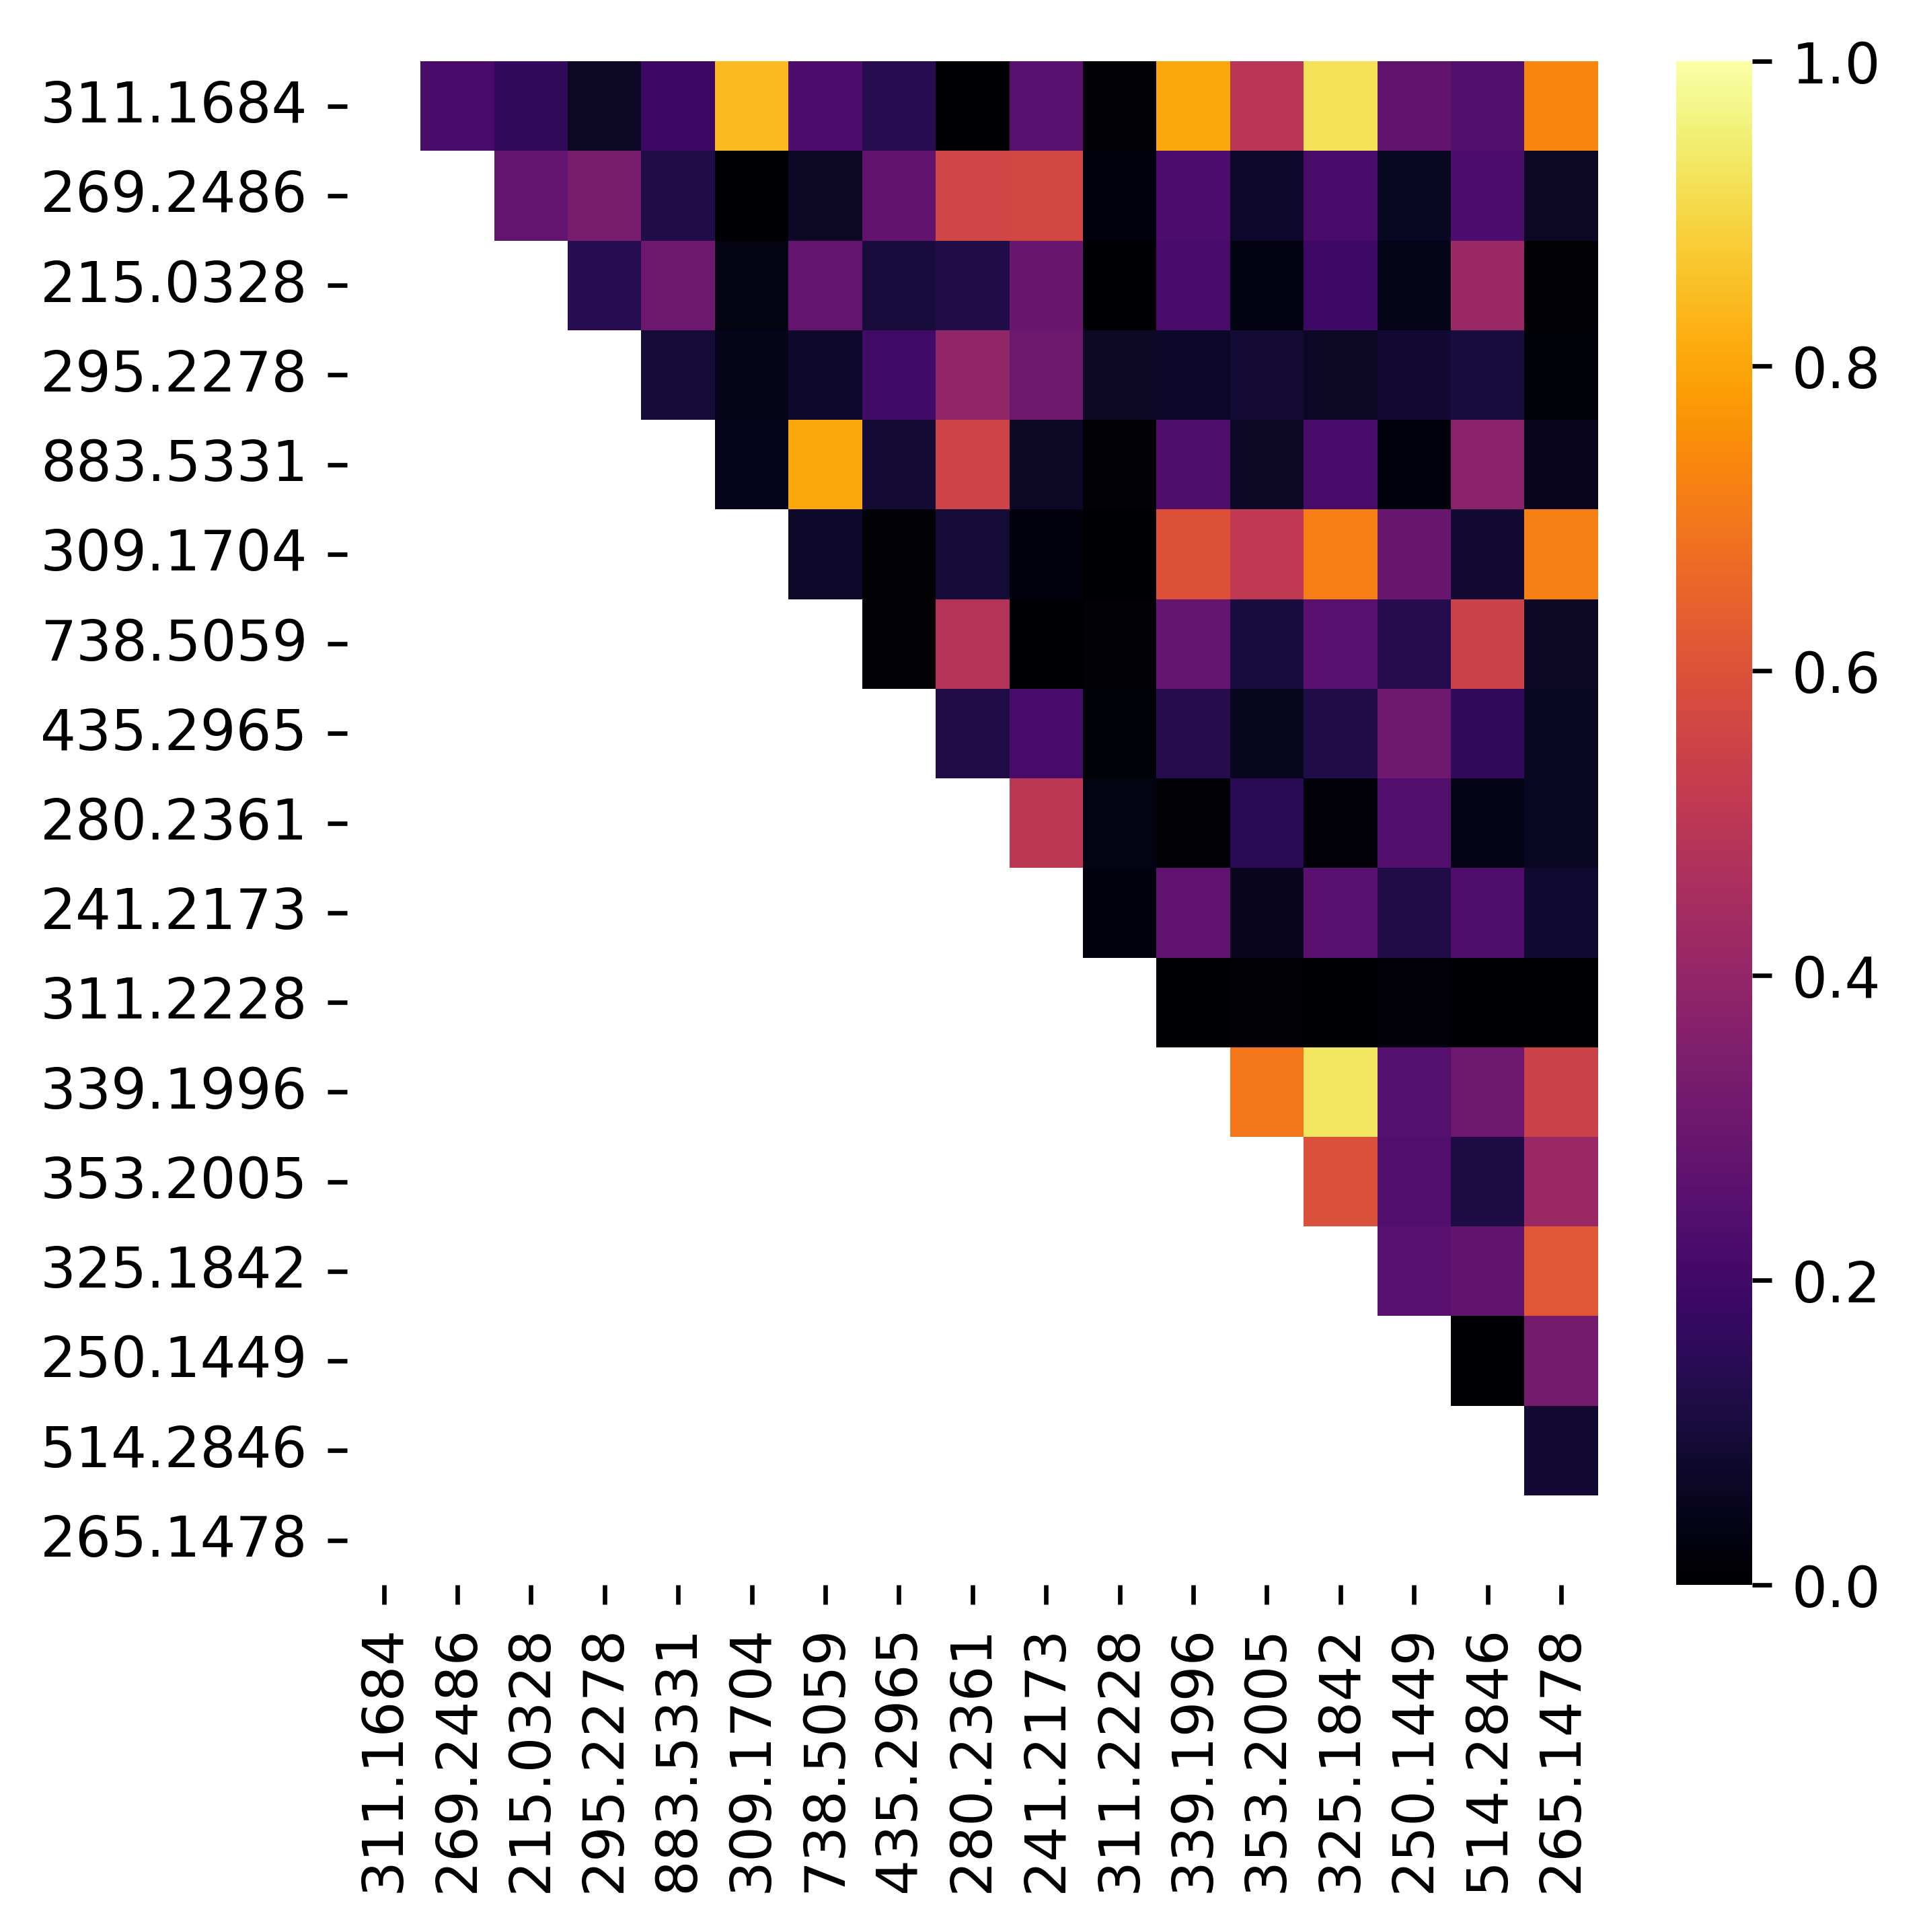

In [11]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

In [17]:
mz_corr(extDEFSDf, "extDEFSDf")

,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478
311.1684,NaN,0.496732,0.178007,0.393025,0.463689,0.140032,0.368589,0.179983,0.429445,0.539760,0.421759,0.856327,0.125323,0.964578,0.543896,0.302969,0.553536
269.2486,NaN,NaN,0.019886,0.890602,0.848310,0.007255,0.768350,0.650322,0.959761,0.965575,0.840896,0.724288,0.035811,0.585976,0.795429,0.532519,0.405290
215.0328,NaN,NaN,NaN,0.137192,0.089663,0.042412,0.188493,0.599101,0.128068,0.017149,0.028538,0.255485,0.007100,0.219890,0.139635,0.306778,0.285346
295.2278,NaN,NaN,NaN,NaN,0.699641,0.047595,0.776593,0.730514,0.922435,0.895480,0.924061,0.573689,0.020441,0.461350,0.694005,0.438693,0.281798
883.5331,NaN,NaN,NaN,NaN,NaN,0.047582,0.769028,0.603876,0.751957,0.857879,0.610159,0.666411,0.065246,0.545656,0.752613,0.609439,0.417095
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.015866,0.047321,0.041009,0.006499,0.038489,0.140807,0.240077,0.146584,0.043609,0.033224,0.231814
738.5059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.653842,0.707923,0.825144,0.745296,0.519728,0.031965,0.422855,0.684172,0.544917,0.237720
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.716398,0.635467,0.612494,0.277070,0.017930,0.210751,0.413473,0.544323,0.066790
280.2361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919797,0.856629,0.634800,0.013628,0.507978,0.728450,0.484710,0.317746
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852583,0.743315,0.041393,0.623403,0.822375,0.525977,0.431173


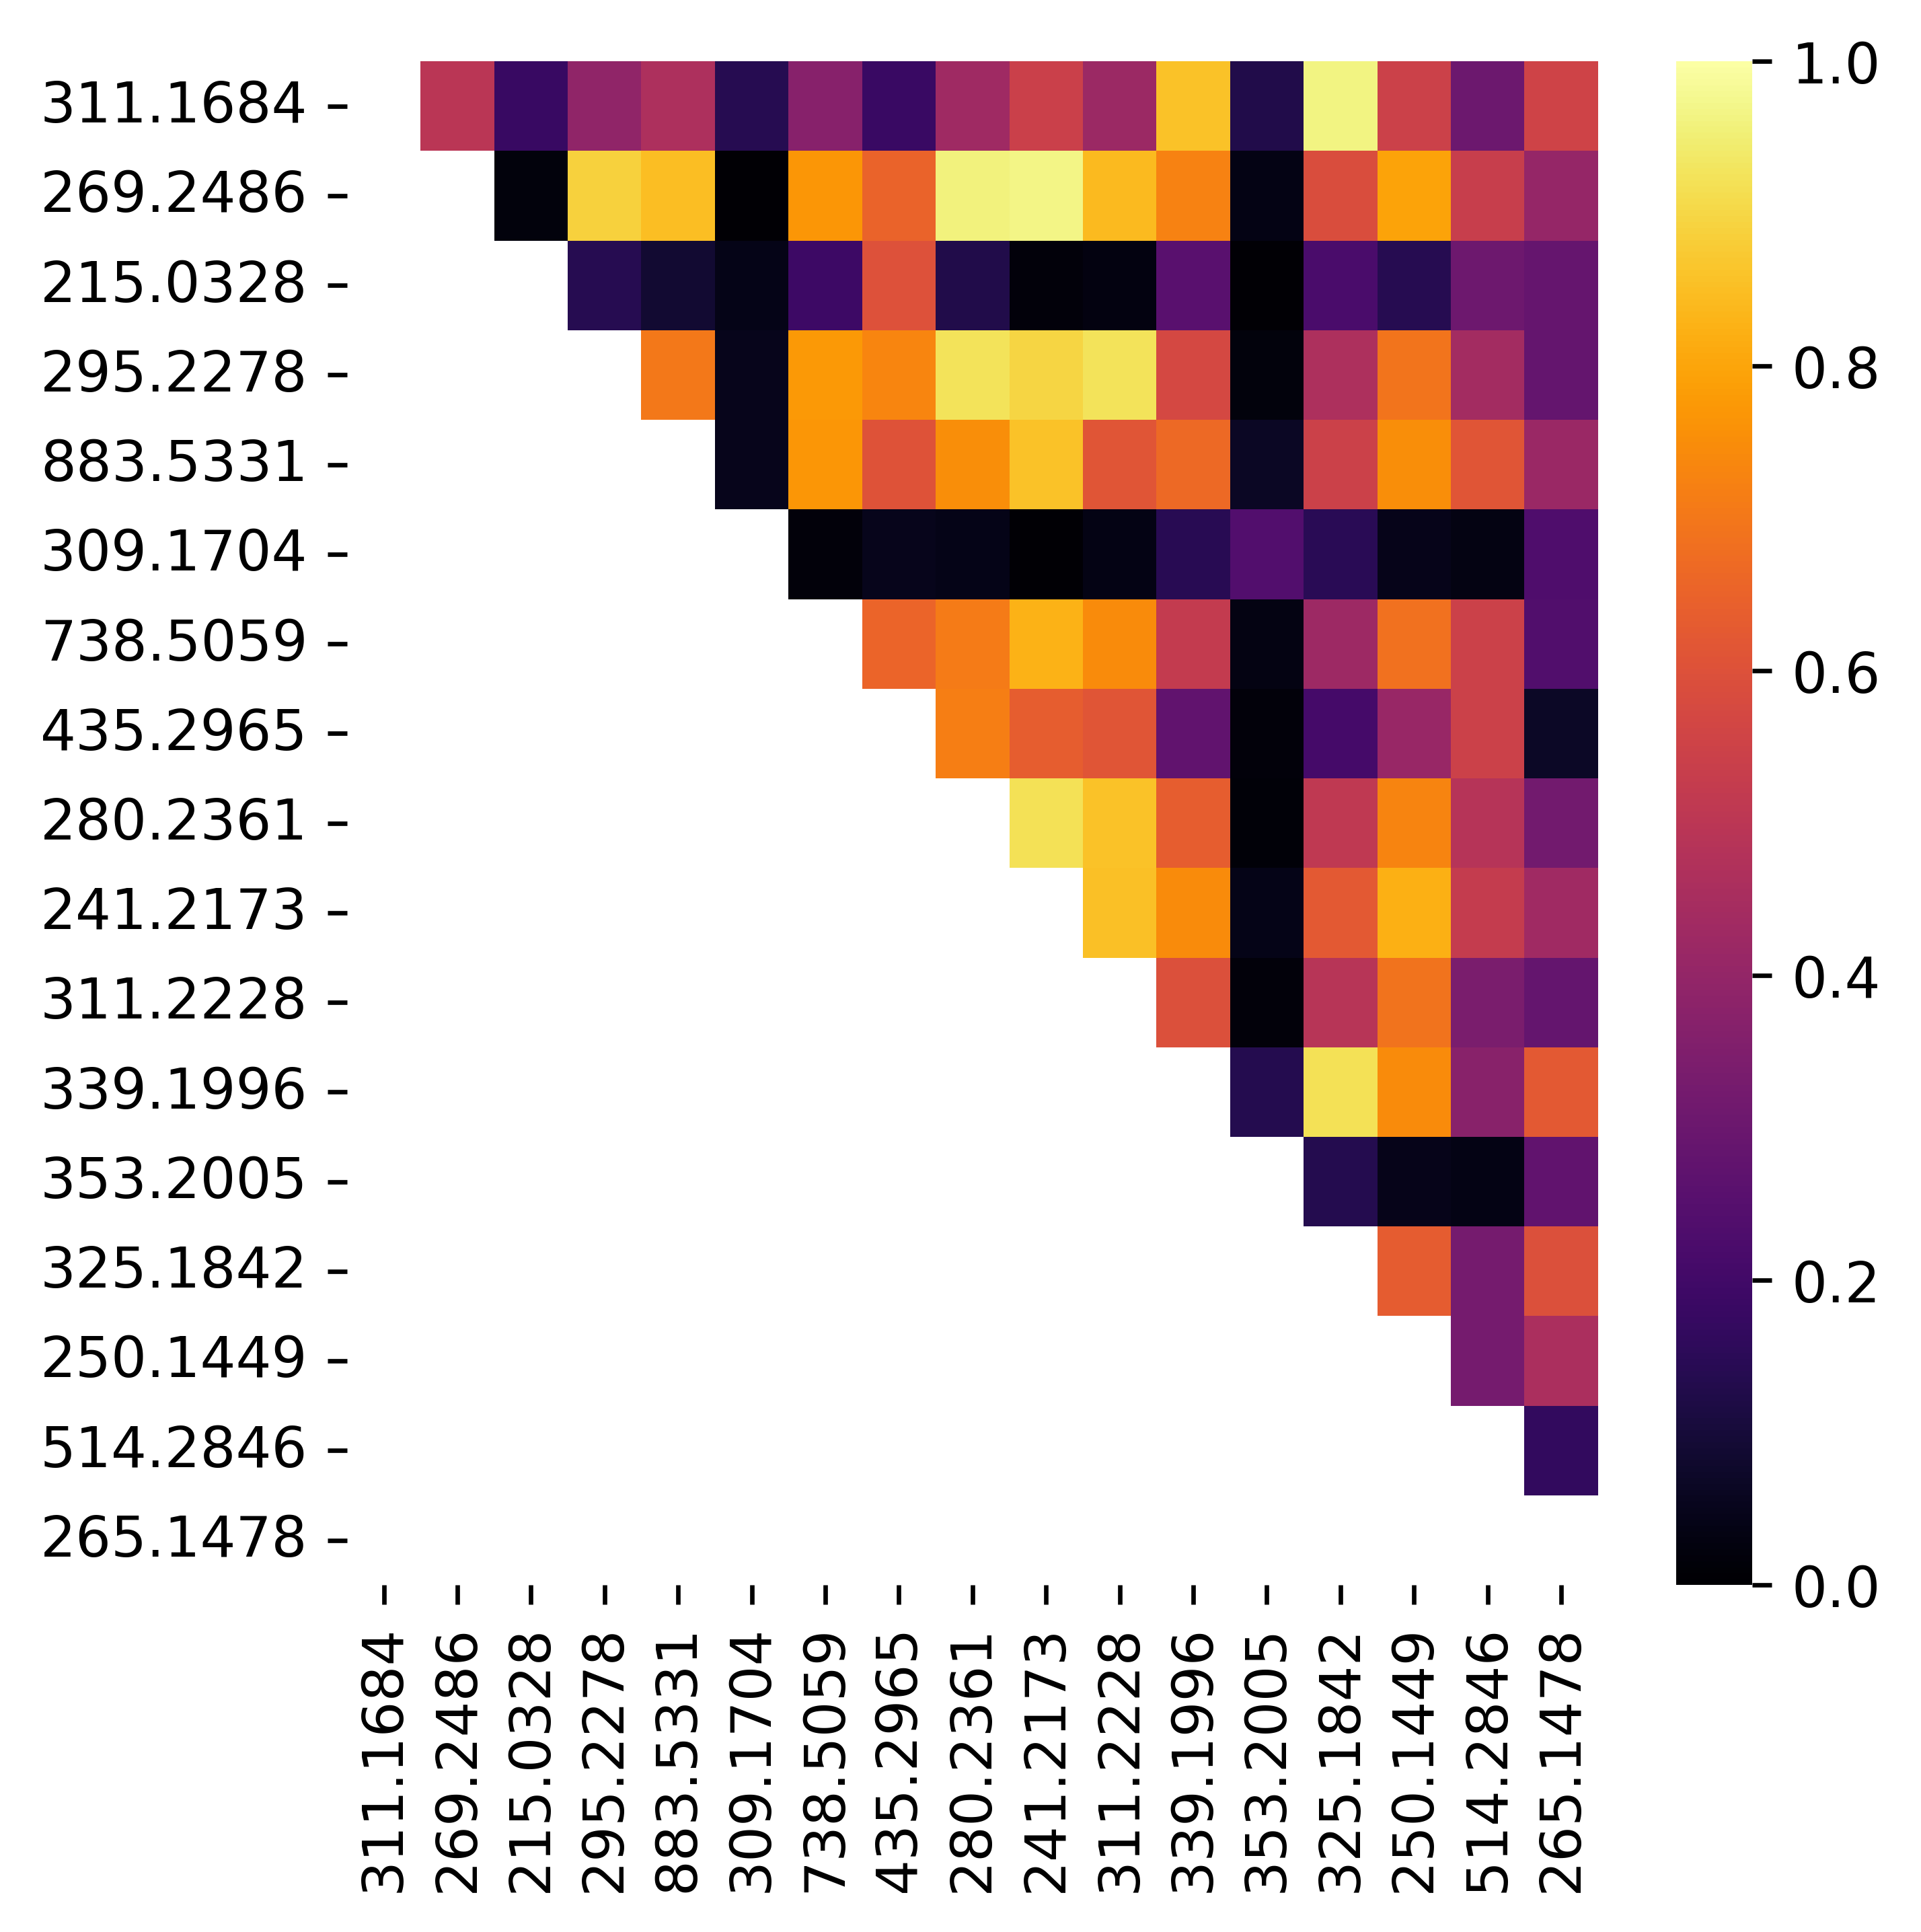

In [12]:
sns_heatmap(mz_corr(extDEFSDf, "extDEFSDf"))

In [18]:
mz_corr(fnaDEFSDf, "fnaDEFSDf")

,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478
311.1684,NaN,0.121305,0.029999,0.055803,0.044009,0.241291,0.024747,0.115513,0.096993,0.164991,0.011864,0.563438,0.555464,0.668456,0.265193,0.091685,0.685210
269.2486,NaN,NaN,0.497454,0.629195,0.067365,0.329908,0.202846,0.395528,0.454916,0.429800,0.540886,0.080142,0.070129,0.116810,0.470202,0.449506,0.126232
215.0328,NaN,NaN,NaN,0.650763,0.305126,0.289814,0.441883,0.626420,0.694048,0.177984,0.655754,0.001910,0.006901,0.037278,0.082567,0.759796,0.025579
295.2278,NaN,NaN,NaN,NaN,0.057075,0.353849,0.289176,0.514816,0.614222,0.363118,0.650484,0.027459,0.013043,0.052507,0.368690,0.525988,0.057412
883.5331,NaN,NaN,NaN,NaN,NaN,0.016974,0.550030,0.182375,0.422223,0.012644,0.058968,0.017443,0.018780,0.036188,0.159935,0.333979,0.066789
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.084030,0.252510,0.247901,0.194810,0.324077,0.199382,0.234814,0.236246,0.227739,0.227579,0.231022
738.5059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.362344,0.612034,0.052530,0.270492,0.008713,0.013552,0.012348,0.039030,0.416283,0.059472
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645472,0.140449,0.588846,0.048800,0.068707,0.081790,0.004193,0.540215,0.219332
280.2361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.114145,0.569521,0.058128,0.079136,0.073453,0.014980,0.550219,0.174518
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.328519,0.110509,0.101883,0.151538,0.651625,0.285200,0.177676


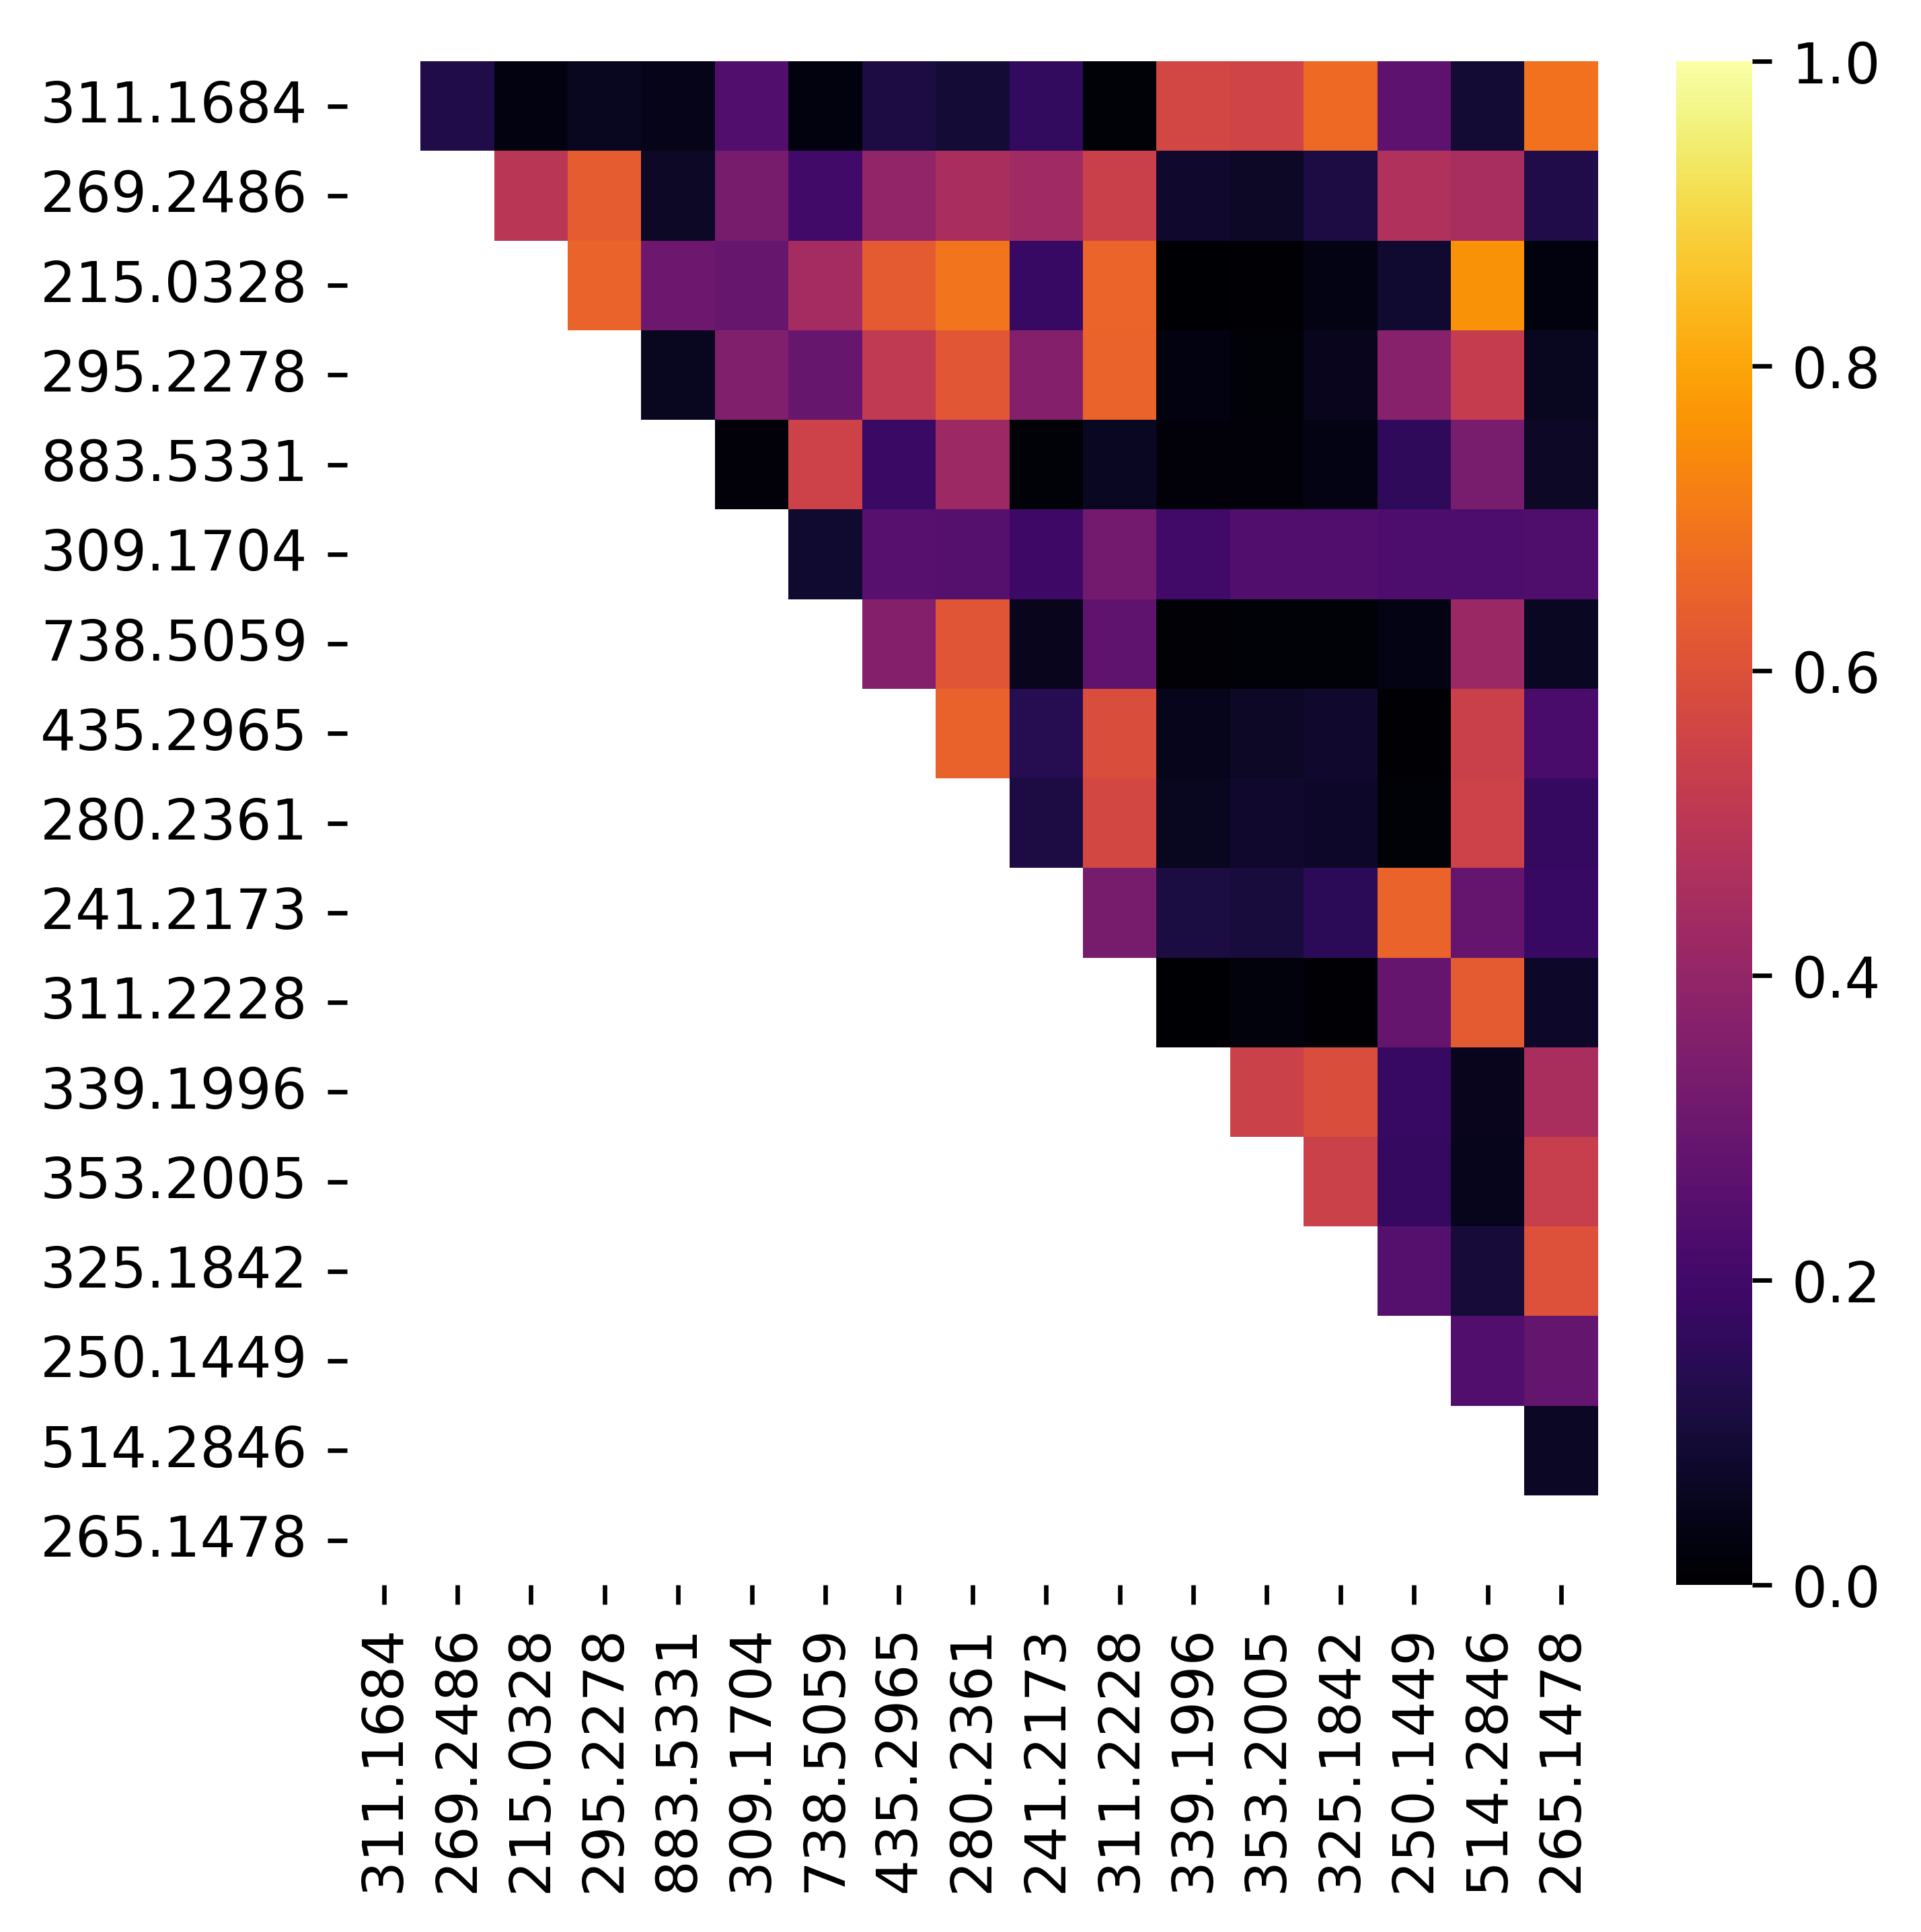

In [13]:
sns_heatmap(mz_corr(fnaDEFSDf, "fnaDEFSDf"))

In [19]:
mz_corr(ingestedDEFSDf, "ingestedDEFSDf")

,311.1684,269.2486,215.0328,295.2278,883.5331,309.1704,738.5059,435.2965,280.2361,241.2173,311.2228,339.1996,353.2005,325.1842,250.1449,514.2846,265.1478
311.1684,NaN,0.122656,0.096336,0.010432,0.151683,0.822434,0.225691,0.124500,0.039054,0.159205,0.040808,0.808159,0.483620,0.919877,0.238363,0.211573,0.731185
269.2486,NaN,NaN,0.028878,0.674284,0.566772,0.084386,0.165711,0.281388,0.740764,0.772028,0.649159,0.136258,0.041208,0.117454,0.416266,0.232893,0.028476
215.0328,NaN,NaN,NaN,0.142651,0.308494,0.061375,0.222411,0.074859,0.111165,0.011354,0.186981,0.118558,0.063206,0.109025,0.151182,0.424004,0.023410
295.2278,NaN,NaN,NaN,NaN,0.552464,0.051430,0.210732,0.261952,0.726828,0.632184,0.763045,0.015890,0.031949,0.003697,0.413512,0.298512,0.023131
883.5331,NaN,NaN,NaN,NaN,NaN,0.044228,0.634568,0.057911,0.701532,0.513913,0.603248,0.175768,0.047552,0.173191,0.367872,0.576013,0.052980
309.1704,NaN,NaN,NaN,NaN,NaN,NaN,0.068938,0.013196,0.002018,0.101516,0.095438,0.592038,0.517998,0.703961,0.159188,0.001746,0.709096
738.5059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064975,0.454430,0.104835,0.203833,0.283034,0.096665,0.257066,0.049600,0.481121,0.071638
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.242192,0.225109,0.159630,0.114475,0.052164,0.112318,0.203767,0.054124,0.056846
280.2361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.662909,0.692864,0.049885,0.026192,0.054186,0.418842,0.280193,0.056715
241.2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607875,0.181061,0.058709,0.158519,0.454295,0.218082,0.047137


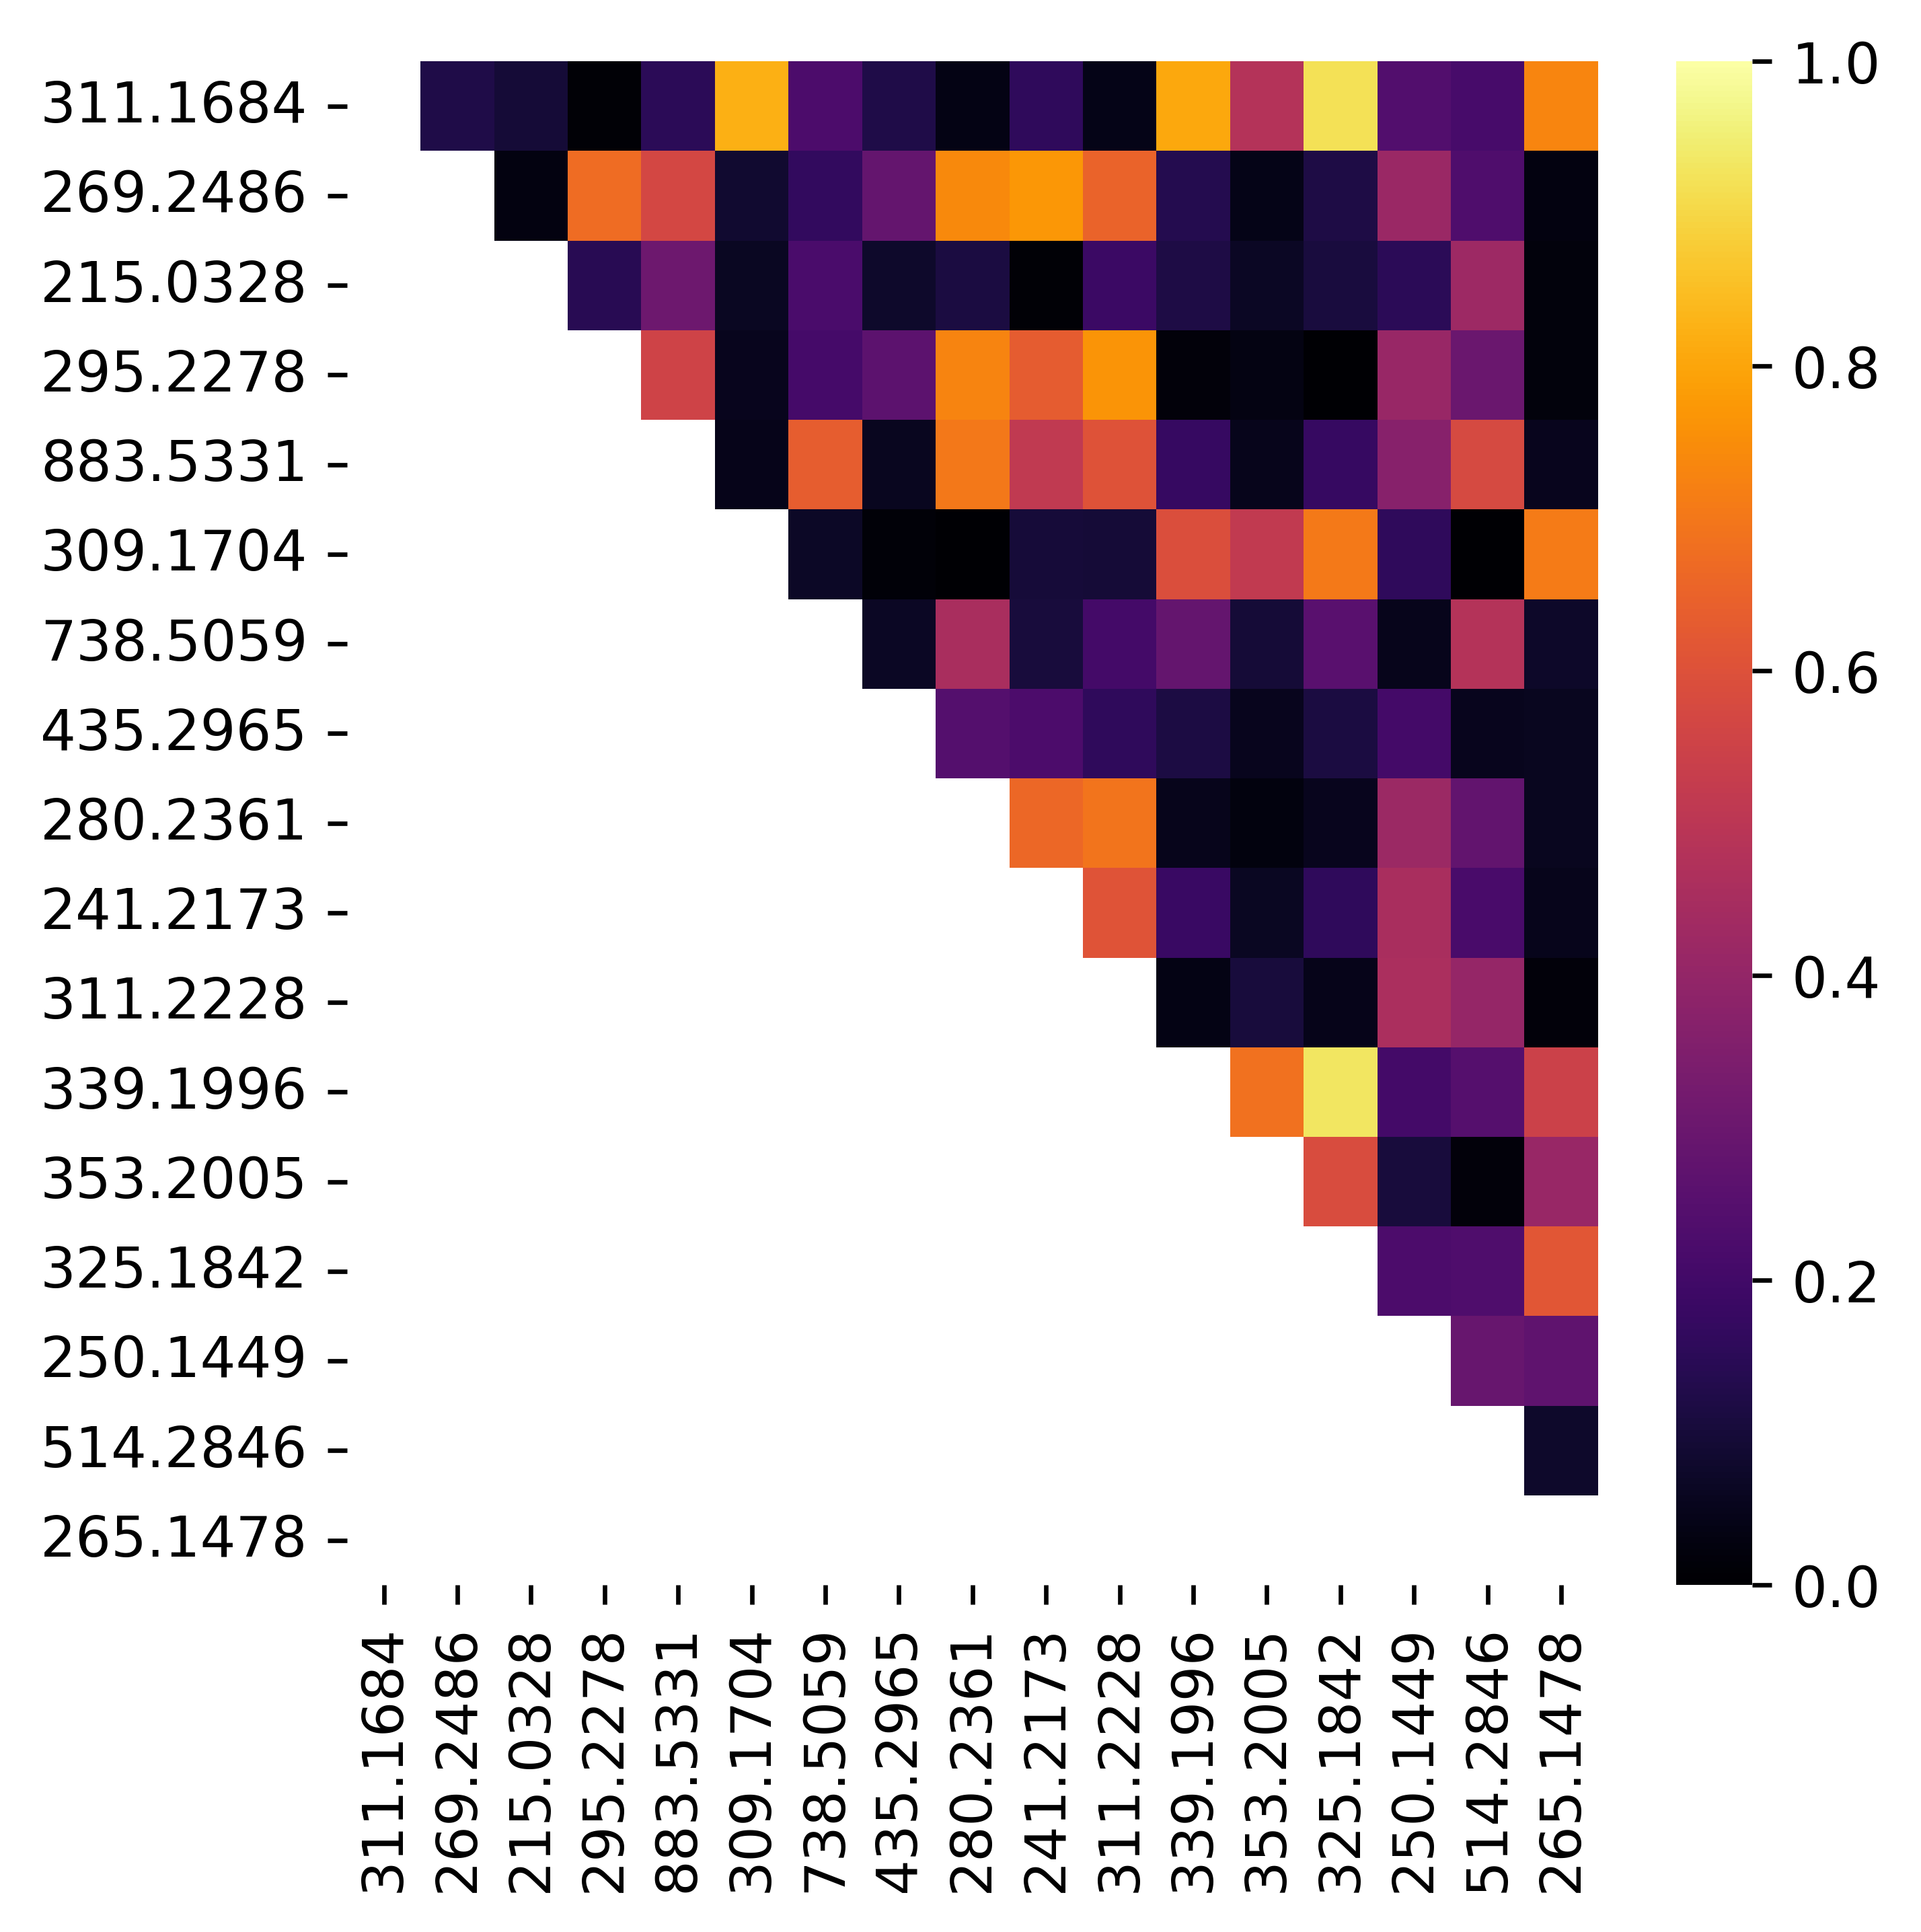

In [14]:
sns_heatmap(mz_corr(ingestedDEFSDf, "ingestedDEFSDf"))

In [20]:
mz_corr(diDEFSDf, "diDEFSDf")

,311.169,269.2486,215.032,295.2279,883.5375,309.1728,738.5084,435.2966,280.2364,241.217,311.2224,339.1999,353.1996,325.1844,250.145,514.2844,265.1479
311.169,NaN,0.406679,0.035521,0.172548,0.256626,0.441903,0.245538,0.424452,0.354150,0.390110,0.099174,0.915732,0.428898,0.978378,0.219603,0.256395,0.429604
269.2486,NaN,NaN,0.161617,0.520350,0.221403,0.623420,0.447457,0.442252,0.514982,0.829359,0.244372,0.600354,0.641570,0.512519,0.710639,0.078304,0.568008
215.032,NaN,NaN,NaN,0.148373,0.182582,0.051043,0.267310,0.185524,0.057015,0.112253,0.031151,0.056656,0.034838,0.046988,0.135622,0.104614,0.079620
295.2279,NaN,NaN,NaN,NaN,0.025540,0.352974,0.048225,0.265488,0.693807,0.445694,0.739086,0.326193,0.329556,0.246646,0.061745,0.142515,0.413765
883.5375,NaN,NaN,NaN,NaN,NaN,0.378820,0.651256,0.240847,0.185494,0.216970,0.145601,0.359164,0.391079,0.307034,0.292133,0.156968,0.329979
309.1728,NaN,NaN,NaN,NaN,NaN,NaN,0.493259,0.333187,0.533933,0.616567,0.083226,0.667198,0.972513,0.563840,0.634231,0.141969,0.966452
738.5084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224012,0.277727,0.378621,0.171398,0.418414,0.513168,0.329623,0.550457,0.281599,0.388895
435.2966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255324,0.525249,0.123778,0.453010,0.347588,0.443347,0.273079,0.013936,0.350586
280.2364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463161,0.341548,0.524245,0.499324,0.442011,0.166231,0.044955,0.587703
241.217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261005,0.575937,0.639162,0.492196,0.720203,0.153419,0.579716


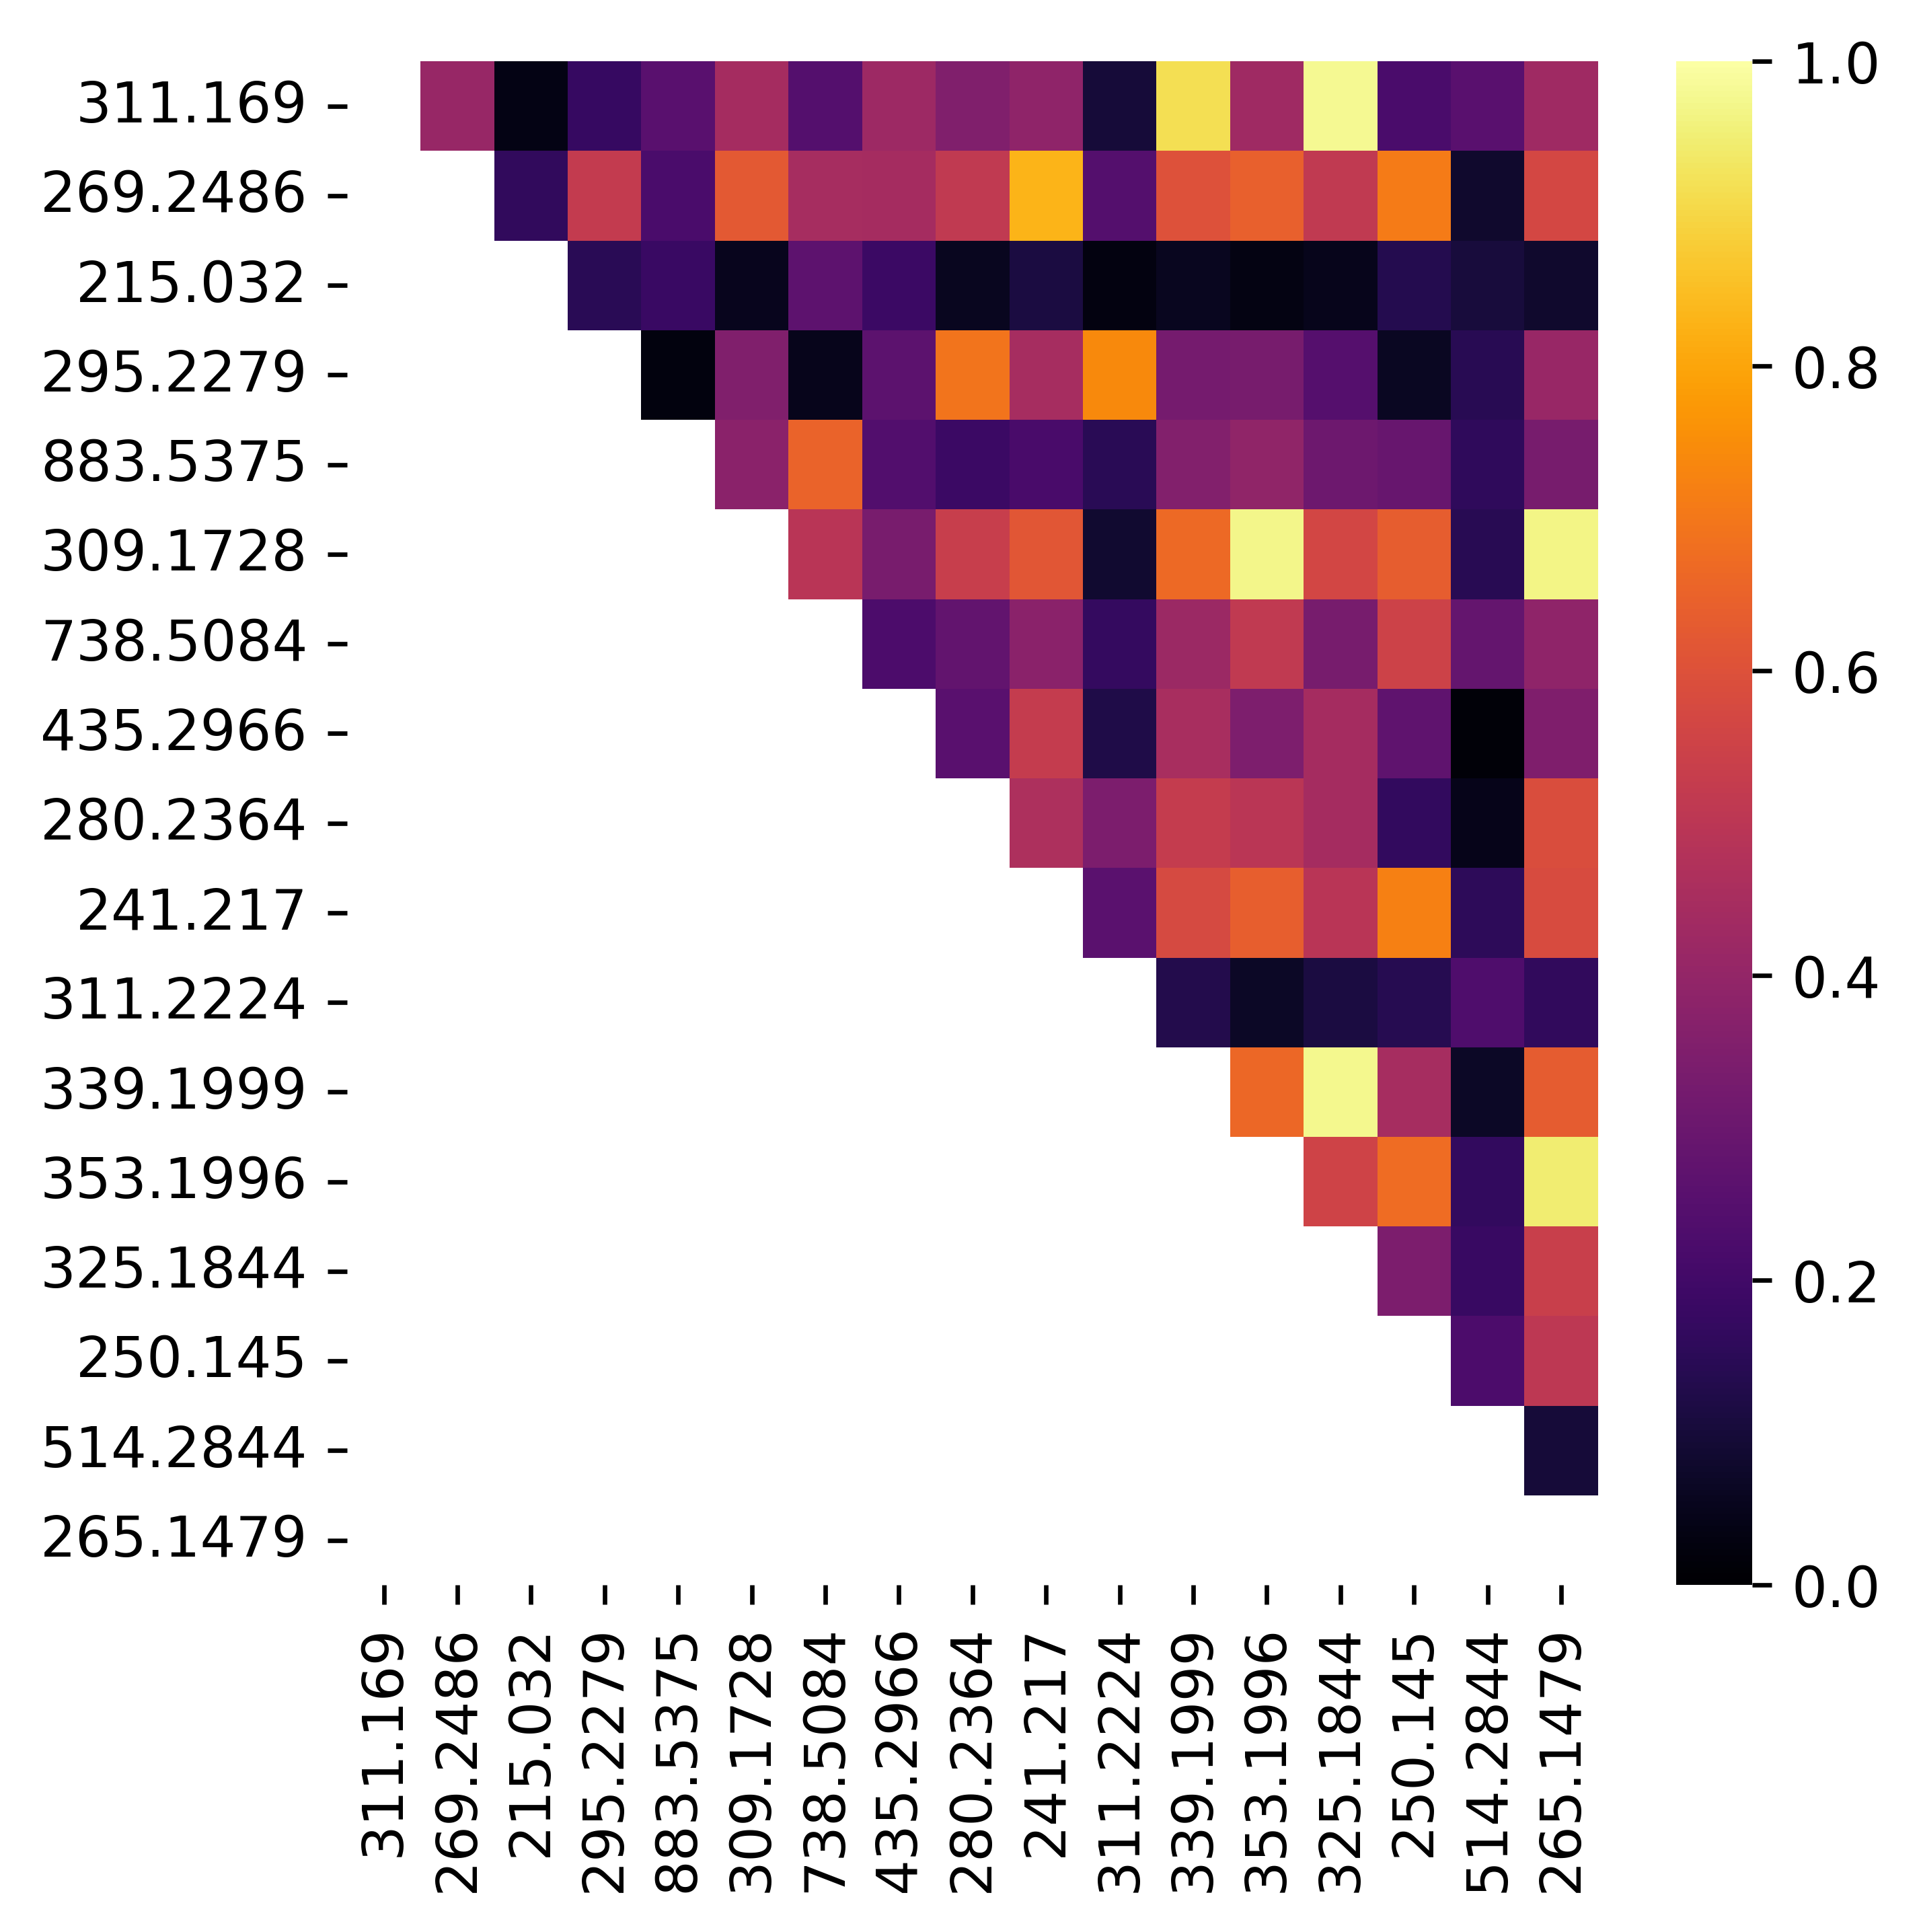

In [15]:
sns_heatmap(mz_corr(diDEFSDf, "diDEFSDf"))